In [18]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [19]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [20]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
digits.images.shape

(1797, 8, 8)

In [22]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


In [23]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [24]:
import torch
import torch.nn as nn
from torch import optim

In [25]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [26]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [27]:
X.size()

torch.Size([1797, 64])

In [28]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.

In [29]:
optimizer = optim.Adam(model.parameters())

In [30]:
losses = []

for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X) # forward 연산
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())

Epoch    0/100 Cost: 2.269583
Epoch   10/100 Cost: 1.858799
Epoch   20/100 Cost: 1.458643
Epoch   30/100 Cost: 1.082448
Epoch   40/100 Cost: 0.761171
Epoch   50/100 Cost: 0.534855
Epoch   60/100 Cost: 0.388252
Epoch   70/100 Cost: 0.291500
Epoch   80/100 Cost: 0.225874
Epoch   90/100 Cost: 0.179225


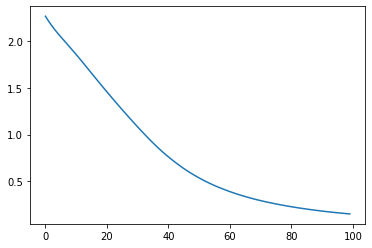

In [31]:
plt.plot(losses)